<b>Introduction</b>

When you're planning to buy an used car, deciding whether the car is worth the advertised price or not is a daunting task. Several factors contribute to the price of an used car like model, make, mileage, year, etc., amongst others. Even from the seller's point of view, deciding the price at which he/she wants to price the car is a dilema.
Which variables are significant in predicting the price of a car,how well those variables describe the price of a car.The task at hand for us is to predict the price of an used car appropriately based on the existing data using machine learning algorithms. We need to use our data exploration skills and find out the importance of each variable in predicting the price of an used car

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.simplefilter("ignore")

In [2]:
# Lets read the dataset
df=pd.read_csv('train-data.csv',index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Lets Deep dive into dataset for further understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


Observations:
1. Price is our 'target' variable.
2. Year, Kilometers_Driven, Seats, Price are the numerical data from our dataset.
3. In the dataset, some of the features have less than 6019 "Non-Null count" implying that there are missing values in those columns(6019 is the total no. of observations).

### Missing Value Analysis

In [4]:
# Missing values in each column in terms of percentage
df.isnull().sum()/df.shape[0]*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

- Columns other than New_Price have very less amount of missing values which need to be imputed appropriately.
- New_Price has more than 86% values missing in it.As 'New_Price' column contains more than 50% null values so drop that column

In [5]:
df=df.drop('New_Price',axis=1)

In [6]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


Observations:
- The min no of seats is 0 - indicating an error in our data, as a 'zero seater' car seems highly improbable to exist
- Price of the car ranges from 44,000 to 1.6 Crores with atleast 75% values less than 9.95 lakhs - outlier indication

In [7]:
df.describe(exclude=[np.number])

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,6019,6019,6019,6019,6019,6017,5983,5983
unique,1876,11,5,2,4,442,146,372
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,790,3205,4299,4929,172,606,235


Observations:
- Mostly of cars have diesel engine in our dataset
- In our dataset most of the observations location are Mumbai

### Univariate Analysis

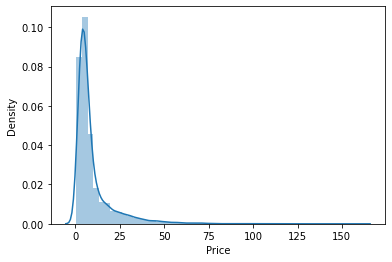

In [8]:
# Analysiing Price attribute
sns.distplot(df['Price'])
plt.show()

We can observe that the distribution of prices shows a high positive skewness 
to the right and this shows that there is a profusion of outliers in the dataset

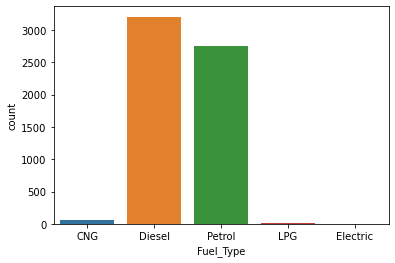

In [9]:
# Analysing Fuel_Type attribute
sns.countplot(x=df['Fuel_Type'])
plt.show()

From above plot we can observe that most of the cars fuel_type are Diesel 

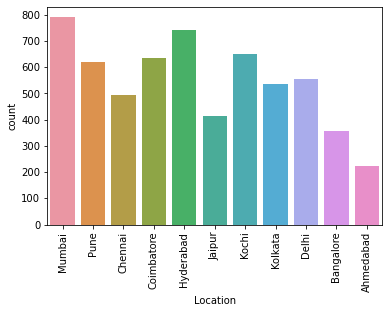

In [10]:
# Analysing Location attribute
sns.countplot(x=df['Location'])
plt.xticks(rotation=90)
plt.show()

From above plot we can observe that Mumbai location have highest count

### Bivariate Analysis

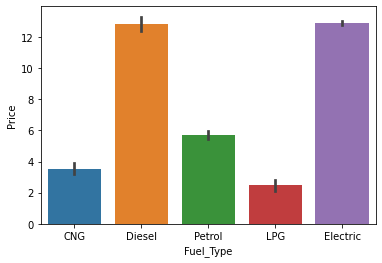

In [11]:
# Scatter plot Fuel_Type / Price
sns.barplot(x=df['Fuel_Type'],y=df['Price'])
plt.show()

From above plot we can observe that cars with fuel_type LPG have lowest prices

From above we can see columns like Mileage,Engine and Power are numerical type but due to their units they are 
categorical so remove these units and convert into numerical value 

In [12]:
df.Mileage=df.Mileage.str.replace(' km/kg','')
df.Mileage=df.Mileage.str.replace(' kmpl','')
df.Power=df.Power.str.replace(' bhp','')
df.Engine=df.Engine.str.replace(' CC','')

In [13]:
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)

In [14]:
df['Power'] = df['Power'].replace('null',np.nan)
df['Power'] = df['Power'].astype(float)

In [15]:
# Seats and Mileage can not be zero so replace 0 with nan values
df.Mileage=df.Mileage.replace(0,np.nan)
df.Seats=df.Seats.replace(0,np.nan)

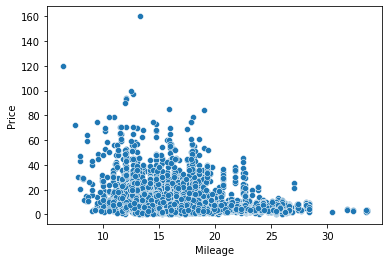

In [16]:
# Scatter plot Mileage / Price
sns.scatterplot(x=df['Mileage'],y=df['Price'])
plt.show()

We see that the lesser is the mileage, the higher tends to be the price. 
Price and Mileage seem to be in an exponential relationship with negative
exponent.

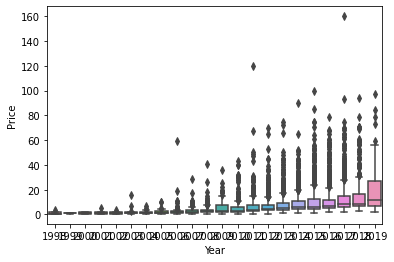

<Figure size 1296x864 with 0 Axes>

In [17]:
sns.boxplot(x=df['Year'],y=df['Price'])
plt.figure(figsize=(18,12))
plt.show()

We can observe a slight increase of Prices the most recent years

### Analyzing Numerical Features

Year


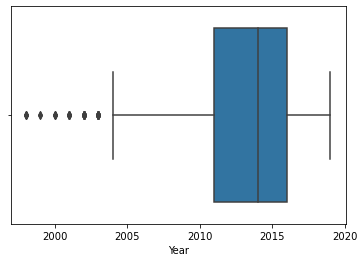

<Figure size 360x360 with 0 Axes>

Kilometers_Driven


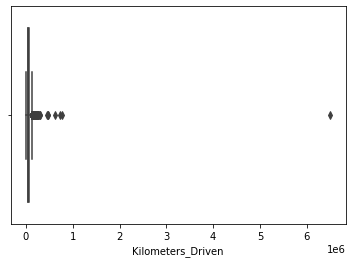

<Figure size 360x360 with 0 Axes>

Mileage


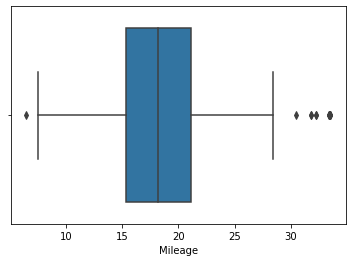

<Figure size 360x360 with 0 Axes>

Engine


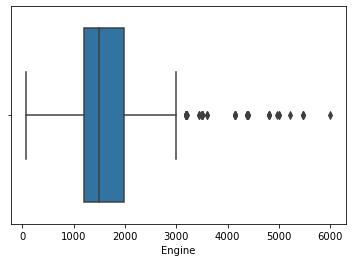

<Figure size 360x360 with 0 Axes>

Power


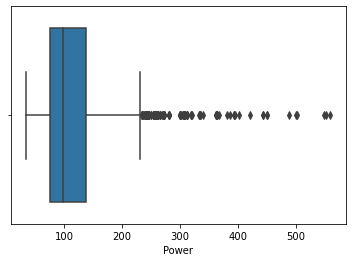

<Figure size 360x360 with 0 Axes>

Seats


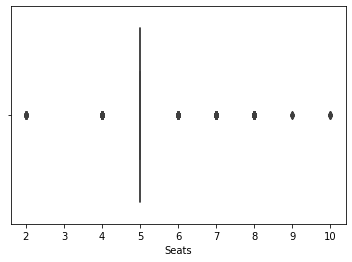

<Figure size 360x360 with 0 Axes>

Price


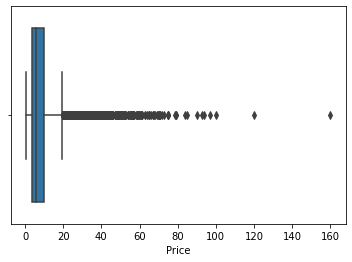

<Figure size 360x360 with 0 Axes>

In [18]:
# Let's check for outliers in our numerical variables
numerical=df.select_dtypes(exclude='object')
for i in numerical:
    print(i)
    sns.boxplot(numerical[i])
    plt.figure(figsize=(5,5))
    plt.show()


- Outliers are present in almost all the columns.
- We need to treat these columns appropriately so that we can build reliable models

### Heatmap

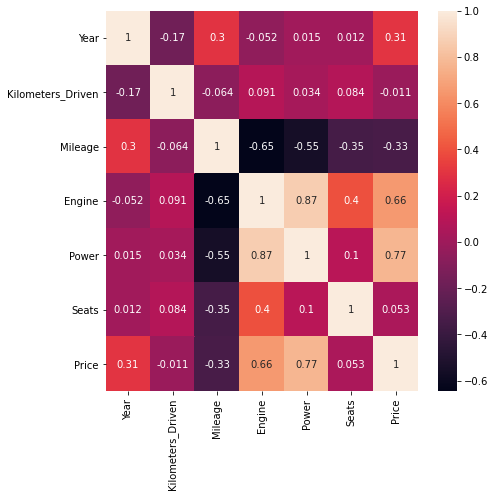

In [19]:
# we analyse numeical variables trying to find any relation between them using pearson correlation
plt.figure(figsize=(7,7))
sns.heatmap(numerical.corr(),annot=True)
plt.show()

- There is high positive correlation between Price - our dependant variable and ew Price, Power, Engine .
- High positive relation among New_Price_converted, Engine, Power. This suggests the presence of Multicolinearity among these variables.
- Slightly negative corelation can be seen between Mileage and price, Mileage and Power

## Data Preprocessing

From the above data anlysis we can understand that Mileage, Engine and New_Price are continous variables and We can see that Year is considered a continuous variable 
let's convert it to a categorical variable to get a better model performance.In data preprocessing first we handle missing values and outliers. 

In [20]:
# Convert data type of Year  from numerical to object 
df['Year'] = df['Year'].astype('object')

### Missing Values Treatment

In [21]:
df.isnull().sum()/df.shape[0]*100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              1.162984
Engine               0.598106
Power                2.375810
Seats                0.714404
Price                0.000000
dtype: float64

In [22]:
df.Seats=df.Seats.fillna(df.Seats.mode()[0])

In [23]:
df.Engine=df.Engine.fillna(df.Engine.median())

In [24]:
df.Mileage=df.Mileage.fillna(df.Mileage.median())

In [25]:
df.Power=df.Power.fillna(df.Power.median())

### Outlier Treatment

In [26]:
# Defining a funtion to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
#capping and flooring of outliers with upper and lower bounds respectively
for i in numerical.drop(['Price','Seats'],axis=1).columns:
    if numerical[i].dtype != 'object':
        lr,ur=remove_outlier(numerical[i])
        numerical[i]=np.where(numerical[i]>ur,ur,numerical[i])
        numerical[i]=np.where(numerical[i]<lr,lr,numerical[i])

In [28]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [29]:
# from the 'Name' variable, we can try to derive the Company Name of each car for deeper analysis
df['Company Name']=df['Name'].str.split().apply(lambda x:x[0])

In [30]:
df=df.drop('Name',axis=1)

In [31]:
df=df[['Company Name','Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [32]:
df.head()

,Company Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### Encoding

In [33]:
# frequency encoding of company name column
fe=df.groupby('Company Name').size()/len(df)
df['Company Name']=df['Company Name'].map(fe)

In [34]:
df.head()

,Company Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0.201196,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,0.183918,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,0.101013,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,0.201196,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,0.039209,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [35]:
# frequency encoding of Location column
fe1=df.groupby('Location').size()/len(df)
df['Location']=df['Location'].map(fe1)

In [36]:
df.head()

,Company Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0.201196,0.131251,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,0.183918,0.103339,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,0.101013,0.082073,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,0.201196,0.082073,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,0.039209,0.105665,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [37]:
df1=df.drop('Year',axis=1)

In [38]:
# encode other categorical variables using one hot encoding together
df_e=pd.get_dummies(df1)
df=pd.concat([df[['Year']],df_e],axis=1)

In [39]:
# Dividing dataset into independent variables and target variable
X=df.drop('Price',axis=1)
y=df.Price                       

In [40]:
# Splitting X and y into train and test dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=10)

###  Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR=LinearRegression()
LR.fit(xtrain,ytrain)
LR_R2_train=LR.score(xtrain,ytrain)
LR_R2_test=LR.score(xtest, ytest)
print("Training score :",round(LR_R2_train,2))
print("Test score:",round(LR_R2_test,2))
y_pred=LR.predict(xtest)

# The mean squared error
print('Mean squared error: %.2f'% round(mean_squared_error(ytest, y_pred),2))

Training score : 0.7
Test score: 0.5
Mean squared error: 53.73


The score function represents R^2 , which is coeeficient of determination. the closer the value to 1, the better the predicter. The R2 value is 0.56 for test data and 0.71 for train dataset which is not satisfactory result. It seems that our model is not working well. We will implement tree based algorithms to get better results.

### Decision Tree Regressor

In [42]:
# Without hyperparameter tuning
DT=DecisionTreeRegressor(random_state=2)
DT.fit(xtrain,ytrain)
DT_R2_train=DT.score(xtrain,ytrain)
DT_R2_test=DT.score(xtest, ytest)
print("Training score :",round(DT_R2_train,2))
print("Test score:",round(DT_R2_test,2))

y_pred=DT.predict(xtest)

# The mean squared error
print('Mean squared error: %.2f'% round(mean_squared_error(ytest, y_pred),2))

Training score : 1.0
Test score: 0.67
Mean squared error: 35.12


There is overfitting in our model, lets hypertune it to get better result

In [43]:
pipe1=Pipeline((
('pt',PowerTransformer()),
('gb',GradientBoostingRegressor(random_state=2))
))

In [44]:
# Hyperparameter tuning using gridSearchCV
DT1=DecisionTreeRegressor(random_state=2)
params={'max_depth':[5,10,15,20,25]}
gd=GridSearchCV(DT1,params,cv=5,scoring='r2')
gd.fit(xtrain,ytrain)
print('best_parameter',gd.best_params_)
print('best Score',gd.best_score_)

best_parameter {'max_depth': 10}
best Score 0.7855445013863462


In [45]:
# Tuned Decision Tree
DT_T=DecisionTreeRegressor(max_depth=10,random_state=2)
DT_T.fit(xtrain,ytrain)
DT_R2_train=DT_T.score(xtrain,ytrain)
DT_R2_test=DT_T.score(xtest, ytest)
print("Training score :",round(DT_R2_train,2))
print("Test score:",round(DT_R2_test,2))

y_pred=DT_T.predict(xtest)

# The mean squared error
print('Mean squared error: %.2f'% round(mean_squared_error(ytest, y_pred),2))

Training score : 0.98
Test score: 0.63
Mean squared error: 39.82


As per the R2 score of train and test, we can see that our model is overfitting on our train data. We will try another model such as Random Forest and Gradient Boost

### Random Forest Regressor

In [46]:
# Without hyperparameter tuning
RF=RandomForestRegressor(random_state=2)
RF.fit(xtrain,ytrain)
RF_R2_train=RF.score(xtrain,ytrain)
RF_R2_test=RF.score(xtest, ytest)
print("Training score :",round(RF_R2_train,2))
print("Test score:",round(RF_R2_test,2))

y_pred=RF.predict(xtest)

# The mean squared error
print('Mean squared error: %.2f'% round(mean_squared_error(ytest, y_pred),2))

Training score : 0.98
Test score: 0.85
Mean squared error: 15.94


There is overfitting in our model, lets hypertune it to get better result

In [47]:
# Hyperparameter tuning using gridSearchCV
RF1=RandomForestRegressor(random_state=2)
params={'max_depth':[5,10,15,20],'n_estimators':[100,150,200,250]}
gd=GridSearchCV(RF1,params,cv=5,scoring='r2')
gd.fit(xtrain,ytrain)
print('best_parameter',gd.best_params_)
print('best Score',gd.best_score_)

best_parameter {'max_depth': 20, 'n_estimators': 100}
best Score 0.885845249597722


In [48]:
# Tuned Random Forest 
RF_T=RandomForestRegressor(max_depth=15,n_estimators=100,random_state=2)
RF_T.fit(xtrain,ytrain)
RF_R2_train=RF_T.score(xtrain,ytrain)
RF_R2_test=RF_T.score(xtest, ytest)
print("Training score :",round(RF_R2_train,2))
print("Test score:",round(RF_R2_test,2))

y_pred=RF_T.predict(xtest)

# The mean squared error
print('Mean squared error: %.2f'% round(mean_squared_error(ytest, y_pred),2))

Training score : 0.98
Test score: 0.85
Mean squared error: 16.21


There is not any change in results after hyperparameter tuning overfitting, lets use Gradient Boost to get better result

### Gradient Boosting Regressor

In [49]:
# Without hyperparameter tuning
GB=GradientBoostingRegressor(random_state=2)
GB.fit(xtrain,ytrain)
GB_R2_train=GB.score(xtrain,ytrain)
GB_R2_test=GB.score(xtest, ytest)
print("Training score :",round(GB_R2_train,2))
print("Test score:",round(GB_R2_test,2))

y_pred=GB.predict(xtest)

# The mean squared error
print('Mean squared error: %.2f'% round(mean_squared_error(ytest, y_pred),2))

Training score : 0.94
Test score: 0.86
Mean squared error: 14.49


In [50]:
# Hyperparameter tuning using gridSearchCV
GB1=GradientBoostingRegressor(random_state=2)
params={'max_depth':[5,10,15,20],'n_estimators':[100,150,200,250]}
gd=GridSearchCV(GB1,params,cv=5,scoring='r2')
gd.fit(xtrain,ytrain)
print('best_parameter',gd.best_params_)
print('best Score',gd.best_score_)

best_parameter {'max_depth': 5, 'n_estimators': 250}
best Score 0.9000184057922374


In [51]:
# Tuned Gradient boost
GB_T=GradientBoostingRegressor(max_depth=5,n_estimators=250,random_state=2)
GB_T.fit(xtrain,ytrain)
GB_R2_train=GB_T.score(xtrain,ytrain)
GB_R2_test=GB_T.score(xtest, ytest)
print("Training score :",round(GB_R2_train,2))
print("Test score:",round(GB_R2_test,2))

y_pred=GB_T.predict(xtest)

# The mean squared error
print('Mean squared error: %.2f'% round(mean_squared_error(ytest, y_pred),2))

Training score : 0.99
Test score: 0.87
Mean squared error: 13.67


### Compare Model Performances

In [52]:
models = []
models.append(('Linear_Regression',LR))
models.append(('Decision_Tree',DT_T))
models.append(('Random_Forest',RF_T))
models.append(('Gradient_Boost',GB_T))

In [53]:
Model=[]
Train_R2=[]
Test_R2=[]
Mean_Squared_Error=[]
for i,j in models:
    Model.append(i)
    j.fit(xtrain,ytrain)
    Train_R2.append(round(j.score(xtrain,ytrain),2))
    Test_R2.append(round(j.score(xtest,ytest),2))
    y_pred=j.predict(xtest)
    Mean_Squared_Error.append(round(mean_squared_error(ytest,y_pred),2))

In [54]:
Model_comparision=pd.DataFrame(list(zip(Model,Train_R2,Test_R2,Mean_Squared_Error)),columns=['Model','Train_R2','Test_R2','Mean_Squared_Error'])

In [55]:
Model_comparision

,Model,Train_R2,Test_R2,Mean_Squared_Error
0,Linear_Regression,0.70,0.50,53.73
1,Decision_Tree,0.98,0.63,39.82
2,Random_Forest,0.98,0.85,16.21
3,Gradient_Boost,0.99,0.87,13.67


<b>Interpretation</b>: 
R-Squared value for train and test data  for the Gradient_Boost is more than other Models. Also, the Mean_Squared_Error value for the Gradient_Boost is less as compared to other Models.Thus, we can say that the Gradient_Boost is the best model.